In [4]:
import os
# import drjit
gpu_num = 1 # Use "" to use the CPU
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import sionna
import tensorflow as tf
import pickle
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
tf.get_logger().setLevel('ERROR')
# tf.config.run_functions_eagerly(True)

import refactor
from refactor.simulation_model import *
from refactor.utils import *
import refactor.simulation_model as sim
import jammer.simulation_model as sim_old

In [5]:
sim.BATCH_SIZE = 128
sim_old.BATCH_SIZE = 128
# sim.MAX_MC_ITER = 500
# sim_old.MAX_MC_ITER = 500
# sim.ebno_dbs = np.linspace(-5, 15, 8)
# sim_old.ebno_dbs = np.linspace(-5, 15, 8)
sim.MAX_MC_ITER = 30
sim_old.MAX_MC_ITER = 30
sim.ebno_dbs = np.linspace(-5, 15, 5)
sim_old.ebno_dbs = np.linspace(-5, 15, 5)

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -5.0 | 6.9462e-02 | 1.0000e+00 |      910451 |    13107200 |         1280 |        1280 |         4.5 |reached max iter       
      0.0 | 2.3865e-02 | 1.0000e+00 |      312799 |    13107200 |         1280 |        1280 |         4.5 |reached max iter       
      5.0 | 1.5468e-02 | 1.0000e+00 |      202743 |    13107200 |         1280 |        1280 |         4.5 |reached max iter       
     10.0 | 1.3240e-02 | 1.0000e+00 |      173545 |    13107200 |         1280 |        1280 |         4.5 |reached max iter       
     15.0 | 1.3400e-02 | 1.0000e+00 |      175639 |    13107200 |         1280 |        1280 |         4.5 |reached max iter       
EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num

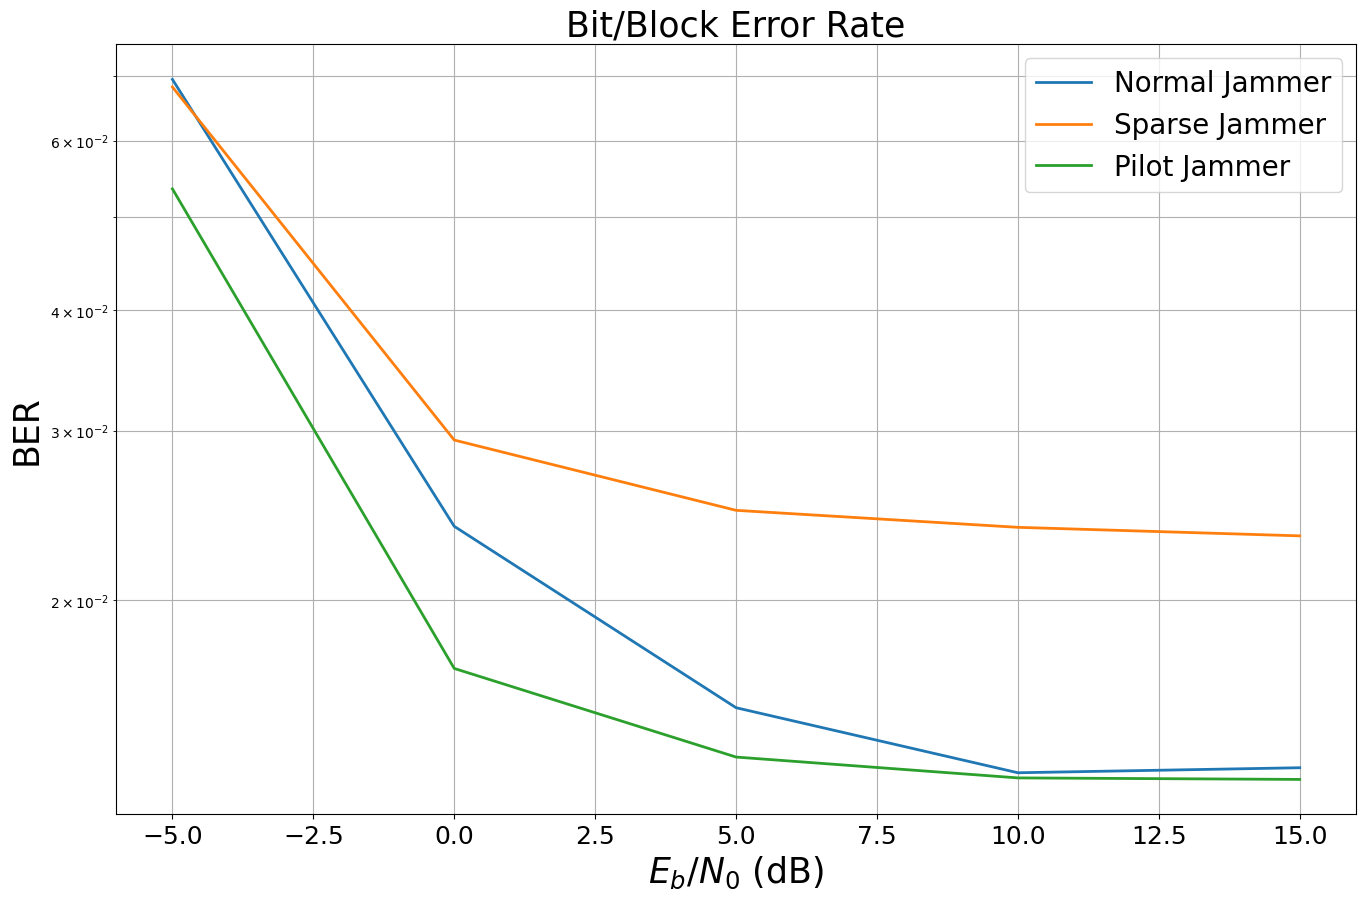

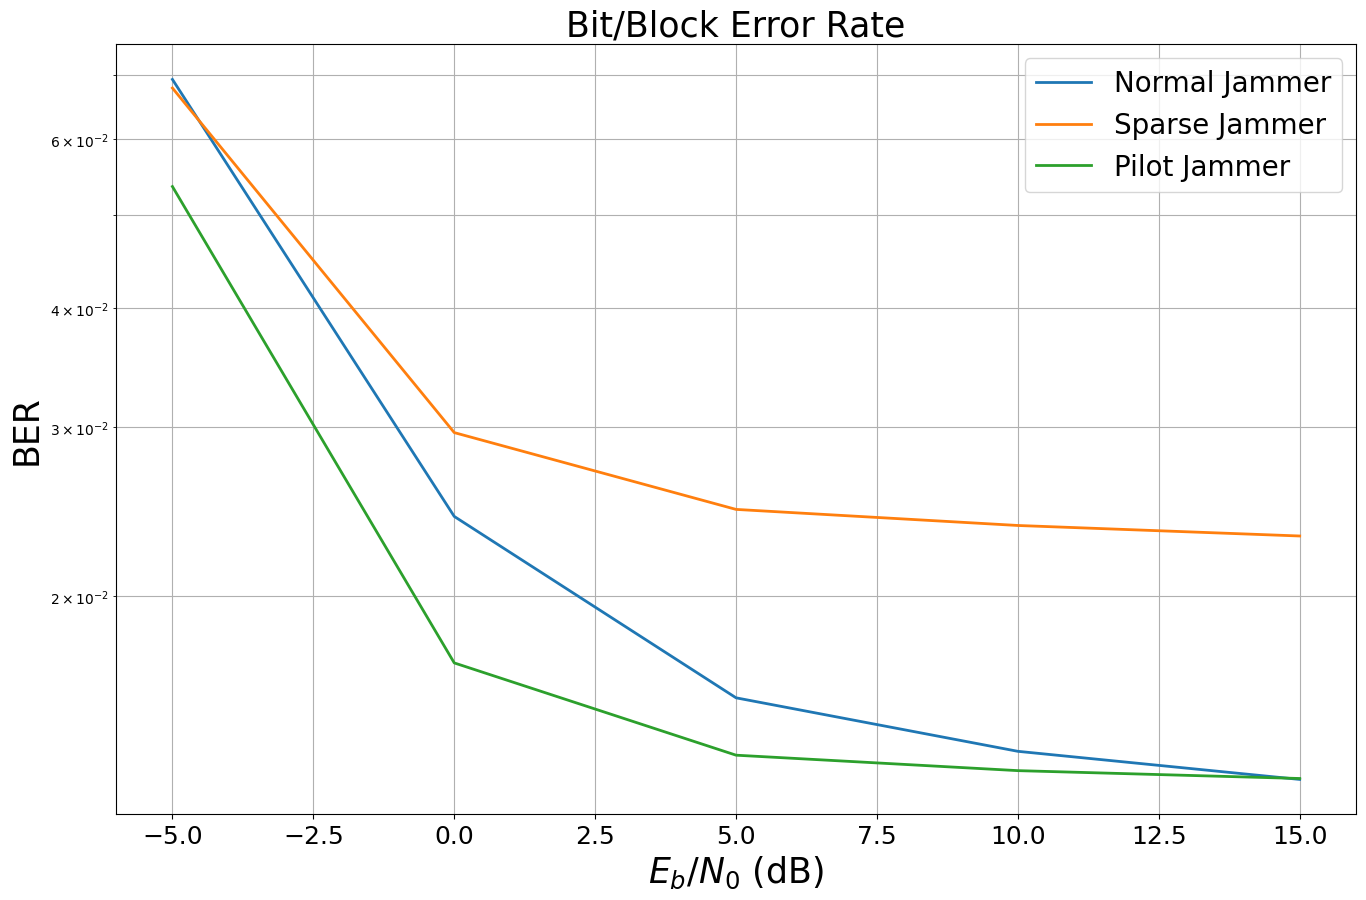

In [7]:
sim_old.ber_plots.reset()
sim.ber_plots.reset()
model_parameters = {}
jammer_parameters = {}
model_parameters['jammer_parameters'] = jammer_parameters
model_parameters['jammer_present'] = True

# test different jammer parameters separately

# jammer with no specific properties
model_parameters['jammer_power'] = 0.5
model = sim.Model(**model_parameters)
sim.simulate_model(model, "Normal Jammer")
model = sim_old.Model(**model_parameters)
sim_old.simulate_model(model, "Normal Jammer")

# sparse jammer
model_parameters['jammer_power'] = 1
jammer_parameters['density_subcarriers'] = 0.2
model = sim.Model(**model_parameters)
sim.simulate_model(model, "Sparse Jammer")
model = sim_old.Model(**model_parameters)
sim_old.simulate_model(model, "Sparse Jammer")

# only pilot jammer (manually)
p = tf.concat([tf.ones([4, 1]), tf.zeros([10, 1])], axis=0)
model_parameters['jammer_power'] = normalize_power(p)
model = sim.Model(**model_parameters)
sim.simulate_model(model, "Pilot Jammer")
model = sim_old.Model(**model_parameters)
sim_old.simulate_model(model, "Pilot Jammer")

sim.ber_plots()
sim_old.ber_plots()

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -5.0 | 8.8222e-02 | 1.0000e+00 |     3469047 |    39321600 |         3840 |        3840 |         3.8 |reached max iter       
      0.0 | 4.2369e-02 | 1.0000e+00 |     1666032 |    39321600 |         3840 |        3840 |         2.9 |reached max iter       
      5.0 | 3.1506e-02 | 1.0000e+00 |     1238882 |    39321600 |         3840 |        3840 |         2.9 |reached max iter       
     10.0 | 2.8236e-02 | 1.0000e+00 |     1110274 |    39321600 |         3840 |        3840 |         2.9 |reached max iter       
     15.0 | 2.7404e-02 | 1.0000e+00 |     1077551 |    39321600 |         3840 |        3840 |         2.9 |reached max iter       
EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num

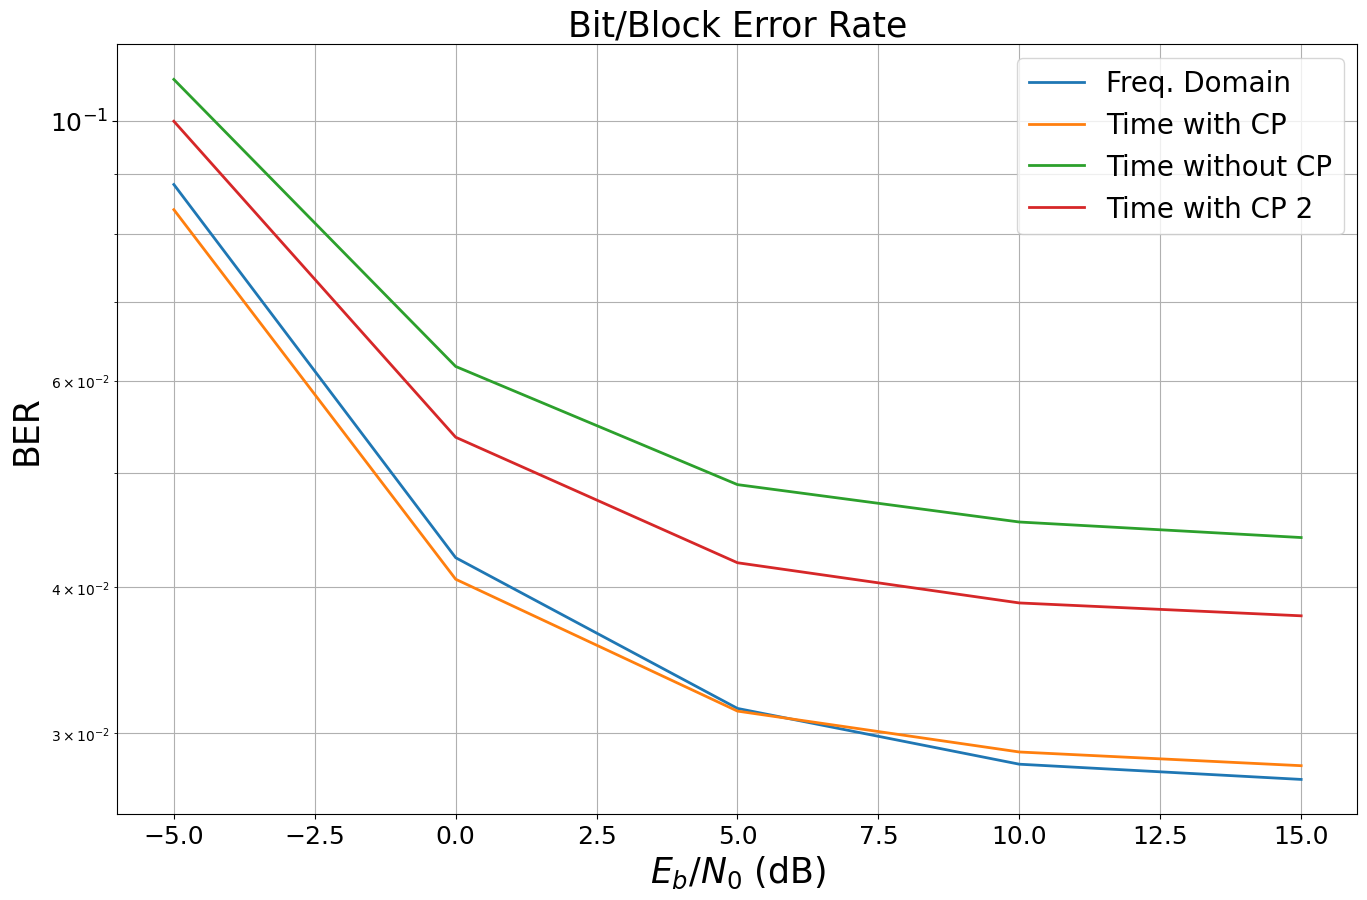

In [9]:
sim.ber_plots.reset()
model_parameters = {}
jammer_parameters = {}
model_parameters['jammer_parameters'] = jammer_parameters

model_parameters['scenario'] = 'rayleigh'
model_parameters['jammer_present'] = True

model = sim.Model(**model_parameters)
sim.simulate_model(model, "Freq. Domain")

model_parameters['domain'] = 'time'
jammer_parameters['cyclic_prefix_length'] = 50
model = sim.Model(**model_parameters)
sim.simulate_model(model, "Time with CP")

model_parameters['cyclic_prefix_length'] = 0
model = sim.Model(**model_parameters)
sim.simulate_model(model, "Time without CP")

model_parameters['cyclic_prefix_length'] = 2
model = sim.Model(**model_parameters)
sim.simulate_model(model, "Time with CP 2")

sim.ber_plots()